<a href="https://colab.research.google.com/github/akanksha1106/create/blob/main/task1_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update -qq
!apt-get install -y mysql-server > /dev/null


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
!service mysql start


 * Starting MySQL database server mysqld
su: warning: cannot change directory to /nonexistent: No such file or directory
   ...done.


In [ ]:
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY 'root'; FLUSH PRIVILEGES;"


In [ ]:
!mysql -uroot -proot -e "SHOW DATABASES;"


mysql: [Warning] Using a password on the command line interface can be insecure.
+--------------------+
| Database           |
+--------------------+
| information_schema |
| mysql              |
| performance_schema |
| sys                |
+--------------------+


In [ ]:
!pip install mysql-connector-python

In [ ]:
!pip install mysql-connector-python eralchemy pandas sqlalchemy pydot graphviz

  Using cached eralchemy-1.6.0-py3-none-any.whl.metadata (7.4 kB)


In [43]:
import sqlite3
import pandas as pd

# Connect to in-memory SQLite database
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Your SQL code (slightly modified: remove AUTO_INCREMENT -> AUTOINCREMENT)
sql_script = """
-- Create database (not needed for SQLite)
-- USE library_db;

CREATE TABLE Authors (
    author_id INTEGER PRIMARY KEY AUTOINCREMENT,
    author_name TEXT NOT NULL,
    nationality TEXT
);

CREATE TABLE Books (
    book_id INTEGER PRIMARY KEY AUTOINCREMENT,
    title TEXT NOT NULL,
    genre TEXT,
    publication_year INTEGER,
    author_id INTEGER,
    FOREIGN KEY (author_id) REFERENCES Authors(author_id)
);

CREATE TABLE Members (
    member_id INTEGER PRIMARY KEY AUTOINCREMENT,
    member_name TEXT NOT NULL,
    email TEXT UNIQUE,
    phone TEXT,
    address TEXT
);

CREATE TABLE Borrow (
    borrow_id INTEGER PRIMARY KEY AUTOINCREMENT,
    book_id INTEGER,
    member_id INTEGER,
    borrow_date DATE,
    return_date DATE,
    FOREIGN KEY (book_id) REFERENCES Books(book_id),
    FOREIGN KEY (member_id) REFERENCES Members(member_id)
);

INSERT INTO Authors (author_name, nationality)
VALUES
('ravi mantri', 'Indian'),
('virajitha', 'Indian');

INSERT INTO Books (title, genre, publication_year, author_id)
VALUES
('Harry Potter and the Sorcerer''s Stone', 'Fantasy', 2022, 1),
('Stone', 'Fantasy', 2021, 2);

INSERT INTO Members (member_name, email, phone, address)
VALUES
('akki', 'akki@mail.com', '9876543210', 'Hyderabad'),
('durga', 'durga@mail.com', '9865234718', 'tanuku');

INSERT INTO Borrow (book_id, member_id, borrow_date, return_date)
VALUES
(1, 1, '2025-10-01', '2025-10-15'),
(2, 2, '2025-10-05', '2025-10-20');
"""

# Execute the SQL script
cursor.executescript(sql_script)

# Query: view borrowed books
query = """
SELECT
    b.borrow_id,
    m.member_name,
    bk.title,
    b.borrow_date,
    b.return_date
FROM Borrow b
JOIN Members m ON b.member_id = m.member_id
JOIN Books bk ON b.book_id = bk.book_id;
"""

df = pd.read_sql_query(query, conn)

In [29]:
from eralchemy2 import render_er

# Generate ER diagram image
render_er('sqlite:///:memory:', 'library_er.png')

from IPython.display import Image
Image(filename='library_er.png')

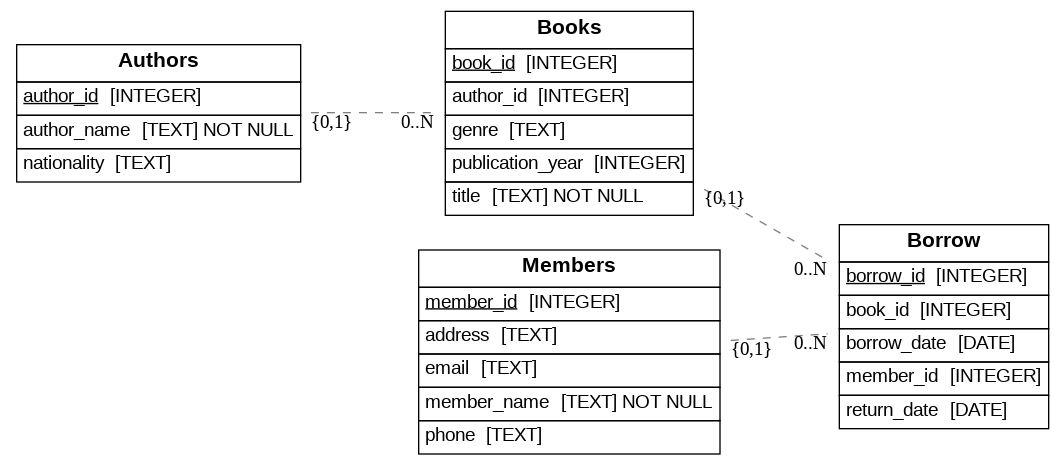

In [27]:
# Save the database to file
conn = sqlite3.connect("library_db.sqlite")
conn.executescript(sql_script)
conn.commit()

# Create ER diagram from that file
render_er('sqlite:///library_db.sqlite', 'library_er.png')

# Display diagram in notebook
Image(filename='library_er.png')

In [23]:
!apt-get update -qq
!apt-get install graphviz libgraphviz-dev pkg-config -y > /dev/null
!pip install sqlalchemy pandas eralchemy2 graphviz pydot pygraphviz

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [37]:
import sqlite3
import pandas as pd

# Connect to file (so ERAlchemy can read it)
conn = sqlite3.connect("library_db.sqlite")
cursor = conn.cursor()

# SQL schema (normalized to 3NF)
sql_script = """
DROP TABLE IF EXISTS Borrow;
DROP TABLE IF EXISTS Members;
DROP TABLE IF EXISTS Books;
DROP TABLE IF EXISTS Authors;

-- ============================
-- DATABASE: Library Management
-- Normalized up to 3NF
-- ============================

-- 1. Authors
CREATE TABLE Authors (
    author_id INTEGER PRIMARY KEY AUTOINCREMENT,
    author_name TEXT NOT NULL,
    nationality TEXT
);

-- 2. Books
CREATE TABLE Books (
    book_id INTEGER PRIMARY KEY AUTOINCREMENT,
    title TEXT NOT NULL,
    genre TEXT,
    publication_year INTEGER,
    author_id INTEGER NOT NULL,
    FOREIGN KEY (author_id) REFERENCES Authors(author_id)
);

-- 3. Members
CREATE TABLE Members (
    member_id INTEGER PRIMARY KEY AUTOINCREMENT,
    member_name TEXT NOT NULL,
    email TEXT UNIQUE,
    phone TEXT,
    address TEXT
);

-- 4. Borrow
CREATE TABLE Borrow (
    borrow_id INTEGER PRIMARY KEY AUTOINCREMENT,
    book_id INTEGER NOT NULL,
    member_id INTEGER NOT NULL,
    borrow_date DATE NOT NULL,
    return_date DATE,
    FOREIGN KEY (book_id) REFERENCES Books(book_id),
    FOREIGN KEY (member_id) REFERENCES Members(member_id)
);

-- ========== INSERT SAMPLE DATA ==========

INSERT INTO Authors (author_name, nationality)
VALUES
('J.K. Rowling', 'British'),
('George Orwell', 'British'),
('Chetan Bhagat', 'Indian');

INSERT INTO Books (title, genre, publication_year, author_id)
VALUES
('Harry Potter and the Sorcerer''s Stone', 'Fantasy', 2022, 1),
('1984', 'Dystopian', 1949, 2),
('Half Girlfriend', 'Romance', 2014, 3);

INSERT INTO Members (member_name, email, phone, address)
VALUES
('akki', 'akki@mail.com', '9876543210', 'Hyderabad'),
('durga', 'durga@mail.com', '9876501234', 'Chennai'),
('buvi', 'buvi@mail.com', '9988776655', 'Delhi');

INSERT INTO Borrow (book_id, member_id, borrow_date, return_date)
VALUES
(1, 1, '2025-10-01', '2025-10-15'),
(2, 2, '2025-10-05', '2025-10-20'),
(3, 3, '2025-10-10', NULL);
"""

cursor.executescript(sql_script)
conn.commit()
print("✅ Database and tables created successfully.")

✅ Database and tables created successfully.


In [39]:
query = """
SELECT
    b.borrow_id,
    m.member_name,
    bk.title AS book_title,
    bk.genre,
    a.author_name,
    b.borrow_date,
    b.return_date
FROM Borrow b
JOIN Members m ON b.member_id = m.member_id
JOIN Books bk ON b.book_id = bk.book_id
JOIN Authors a ON bk.author_id = a.author_id;
"""

df = pd.read_sql_query(query, conn)
df

,borrow_id,member_name,book_title,genre,author_name,borrow_date,return_date
0,1,akki,Harry Potter and the Sorcerer's Stone,Fantasy,J.K. Rowling,2025-10-01,2025-10-15
1,2,durga,1984,Dystopian,George Orwell,2025-10-05,2025-10-20
2,3,buvi,Half Girlfriend,Romance,Chetan Bhagat,2025-10-10,None


In [34]:
query = """
SELECT
    b.borrow_id,
    m.member_name,
    bk.title AS book_title,
    bk.genre,
    a.author_name,
    b.borrow_date,
    b.return_date
FROM Borrow b
JOIN Members m ON b.member_id = m.member_id
JOIN Books bk ON b.book_id = bk.book_id
JOIN Authors a ON bk.author_id = a.author_id;
"""

df = pd.read_sql_query(query, conn)
df
query = """
SELECT
    b.borrow_id,
    m.member_name,
    bk.title AS book_title,
    bk.genre,
    a.author_name,
    b.borrow_date,
    b.return_date
FROM Borrow b
JOIN Members m ON b.member_id = m.member_id
JOIN Books bk ON b.book_id = bk.book_id
JOIN Authors a ON bk.author_id = a.author_id;
"""

df = pd.read_sql_query(query, conn)
df

,borrow_id,member_name,book_title,genre,author_name,borrow_date,return_date
0,1,akki,Harry Potter and the Sorcerer's Stone,Fantasy,J.K. Rowling,2025-10-01,2025-10-15
1,2,durga,1984,Dystopian,George Orwell,2025-10-05,2025-10-20
2,3,buvi,Half Girlfriend,Romance,Chetan Bhagat,2025-10-10,None


In [11]:
from IPython.display import Markdown, display

normalization_report = """
# 📘 Normalization Report (Library Management System)

| Normal Form | Description | How It’s Applied |
|--------------|--------------|------------------|
| *1NF* | Each field holds atomic (indivisible) values; no repeating groups | Each table has single-valued columns (e.g., author_name, title) |
| *2NF* | All non-key attributes depend on the whole primary key | Each table has a single-column primary key (author_id, book_id, etc.) |
| *3NF* | No transitive dependencies (non-key attributes depend only on PK) | Author info moved to Authors, Member info to Members, Borrow uses only IDs |

*→ The schema satisfies up to Third Normal Form (3NF).*
"""
display(Markdown(normalization_report))



# 📘 Normalization Report (Library Management System)

| Normal Form | Description | How It’s Applied |
|--------------|--------------|------------------|
| *1NF* | Each field holds atomic (indivisible) values; no repeating groups | Each table has single-valued columns (e.g., author_name, title) |
| *2NF* | All non-key attributes depend on the whole primary key | Each table has a single-column primary key (author_id, book_id, etc.) |
| *3NF* | No transitive dependencies (non-key attributes depend only on PK) | Author info moved to Authors, Member info to Members, Borrow uses only IDs |

*→ The schema satisfies up to Third Normal Form (3NF).*
